In [2]:
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt

# a

In [3]:
X = pd.DataFrame(scipy.io.loadmat('rand')["dataset"][0][0][0])

In [4]:
Y = pd.DataFrame(scipy.io.loadmat('rand')["dataset"][0][0][1])

In [5]:
np.array(scipy.io.loadmat('rand')["dataset"])[0][0][2]

array([[1732],
       [2078],
       [1190]], dtype=uint16)

In [6]:
import math

def find_cluster(X, k, mu):
    for i, x in X.iterrows():
        best_distance = math.inf
        best_cluster = None
        for j in range(k):
            new_distance = np.linalg.norm(x-mu.iloc[j])
            if new_distance < best_distance:
                best_distance = new_distance
                best_cluster = j
            
        X.at[i, "cluster"] = best_cluster
            
    return X

In [7]:
def calculate_means(X, k):
    data_list = []
    for i in range(k):
        data_list.append(X[X["cluster"]==i].mean())
    
    mu = pd.DataFrame(data_list)
    return mu

In [8]:
def sse_error(X, k):
    error = 0
    for i in range(k):
        X_cluster = X[X["cluster"]==i]
        m = X_cluster.mean()
        for index, x in X_cluster.iterrows():
            error += np.linalg.norm(x-m)**2
    return error

In [9]:
import math

def kmeanscluster(X, k, mu, tol, maxIter):
    prev_error = math.inf
    for iter in range(maxIter):
        X = find_cluster(X, k, mu)
        mu = calculate_means(X, k)
        new_error = sse_error(X, k)
        if iter%5==0:
            print(iter, new_error)
        if prev_error - new_error < tol:
            break
        prev_error = new_error
    return X

0 331088.91610928235
5 299594.68315172667
0 578002.2277590357
5 165734.4494330864
10 158598.51828229372
0 264124.68724454095
5 98153.05967166135
10 91864.54997542335
0 94304.97337816835
5 75180.52633372217
10 69509.53067163382


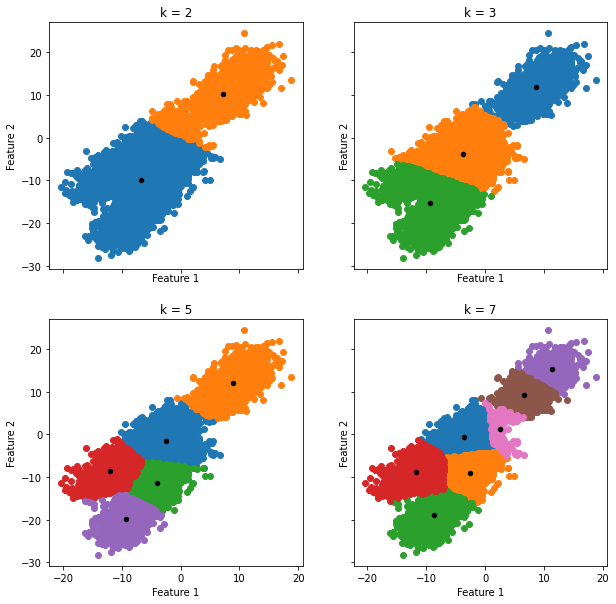

In [11]:
fig, ax = plt.subplots(2,2, sharex=True, sharey=True)

for ki, k in enumerate([2, 3, 5, 7]):
    mu = X.sample(n=k)

    C = kmeanscluster(X=X, k=k, mu=mu, tol=100, maxIter=25)

    means_0 = []
    means_1 = []

    for i in range(k):
        ax[int(ki/2)][ki%2].scatter(C[C["cluster"]==i][0], C[C["cluster"]==i][1])
        ax[int(ki/2)][ki%2].set_title(f"k = {k}")
        means_0.append(C[C["cluster"]==i][0].mean())
        means_1.append(C[C["cluster"]==i][1].mean())

    ax[int(ki/2)][ki%2].scatter(means_0, means_1, c="black", s=20)
    plt.setp(ax[int(ki/2)][ki%2], xlabel="Feature 1", ylabel="Feature 2")

# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")    
fig.set_size_inches(10,10)
plt.show()    

# b

0 919342.9152190366
0 368713.59412334027
5 299607.4038572601
0 304750.1358728797
5 182788.59268776898
10 158832.3335236236
0 564112.3764162044
5 124834.91276396911
10 118845.66852907989
0 133617.88404678446
5 99241.80891690562
0 105542.22483046658
5 79087.68525860278
10 75308.55351723853
0 82776.72450972434
5 64390.43649245789
10 63415.613459344735
0 70522.2843478685
5 62123.13196513142
0 69917.15809544227
5 63047.01170686513
10 60660.8327185513
15 58581.87348372501
20 57697.96939179032
0 53931.56746043155
5 44987.69541286233


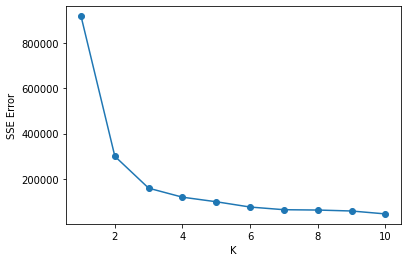

In [14]:
k_list = []
error_list = []

for k in range(1,11):
    mu = X.sample(n=k)

    C = kmeanscluster(X=X, k=k, mu=mu, tol=100, maxIter=25)
    
    k_list.append(k)
    error_list.append(sse_error(C, k))
    
plt.scatter(k_list, error_list)
plt.plot(k_list, error_list)
plt.xlabel("K")
plt.ylabel("SSE Error")
plt.title("")
plt.show()

# c

In [ ]:
def medoid_error(X, med):
    error = 0
    for item, x in X.iterrows():
        error += np.linalg.norm(x.drop(columns=["cluster"])-med[x["cluster"]])
    return error

In [ ]:
def kmedoidscluster(X, k, med, tol, maxIter):
    for iter in range(maxIter):
        pass

# d

In [19]:
pd.read_csv("gene_ex.csv", header=None).T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.961933,-0.292526,0.258788,-1.152132,0.195783,0.030124,0.085418,1.116610,-1.218857,1.267369,...,1.325041,-0.116171,-1.470146,-0.379272,-1.465006,1.075148,-1.226125,-3.056328,1.450658,0.717977
1,0.441803,-1.139267,-0.972845,-2.213168,0.593306,-0.691014,-1.113054,1.341700,-1.277279,-0.918349,...,0.740838,-0.162392,-0.633375,-0.895521,2.034465,3.003267,-0.501702,0.449889,1.310348,0.763482
2,-0.975005,0.195837,0.588486,-0.861525,0.282992,-0.403426,-0.677969,0.103278,-0.558925,-1.253500,...,-0.435533,-0.235912,1.446660,-1.127459,0.440849,-0.123441,-0.717430,1.880362,0.383837,0.313576
3,1.417504,-1.281121,-0.800258,0.630925,0.247147,-0.729859,-0.562929,0.390963,-1.344493,-1.067114,...,-3.065529,1.597294,0.737478,-0.631248,-0.530442,-1.036740,-0.169113,-0.742841,-0.408860,-0.326473
4,0.818815,-0.251439,-1.820398,0.951772,1.978668,-0.364099,0.938194,-1.927491,1.159115,-0.240638,...,-2.378938,-0.086946,-0.122342,1.418029,1.075337,-1.270604,0.599530,2.238346,-0.471111,-0.158700
5,0.316294,2.511997,-2.058924,-1.165724,-0.871018,1.125349,0.118809,0.451692,-1.501044,1.163889,...,0.101693,1.019600,-0.553600,0.731371,0.298128,-1.277029,-0.997987,-0.291738,-1.392396,0.468113
6,-0.024967,-0.922206,-0.064764,-0.391559,-0.989715,-1.404041,-2.192225,-1.345070,-0.554120,0.565089,...,0.263076,0.583638,1.779488,0.636580,2.515097,-0.278504,0.028236,1.270233,-0.805808,0.519161
7,-0.063966,0.059543,1.592124,1.063619,-1.032253,-0.806130,0.685073,0.625336,0.691499,0.949329,...,-0.603931,-0.581503,-0.346134,-0.083600,0.191902,1.249723,0.200508,0.696415,0.210900,-0.427099
8,0.031497,-1.409645,-0.173117,-0.350009,-1.109654,-1.237924,0.262304,0.816305,-0.881673,2.372266,...,-0.427227,-0.127644,1.196953,1.078757,0.325376,-0.706994,-1.364865,1.242857,1.727079,2.759068
9,-0.350311,-0.656712,-0.121087,-1.489058,-0.385142,0.577602,-1.229459,-0.358081,0.454120,1.706587,...,-0.205602,-0.105960,-0.181468,-0.539269,0.790791,-0.704671,0.564957,0.429148,0.862870,-2.571514


In [20]:
np.random.rand(15, 12) 

array([[0.5454236 , 0.34883652, 0.30351722, 0.96460742, 0.04316279,
        0.46788112, 0.27697414, 0.62425205, 0.80203277, 0.73525222,
        0.3346137 , 0.62546383],
       [0.86323305, 0.60418737, 0.53292495, 0.34398204, 0.04727277,
        0.92106694, 0.50946305, 0.82761833, 0.98236332, 0.99210004,
        0.30732804, 0.49607288],
       [0.27714498, 0.54769883, 0.71996825, 0.78575777, 0.85781974,
        0.02789882, 0.1967945 , 0.12029374, 0.55867662, 0.43649848,
        0.55740514, 0.81676011],
       [0.92952274, 0.86594679, 0.90324518, 0.63207107, 0.73680595,
        0.125714  , 0.35313044, 0.3251351 , 0.40871023, 0.0060094 ,
        0.54829216, 0.24213662],
       [0.78200341, 0.39451811, 0.27711772, 0.07997578, 0.66256206,
        0.37363526, 0.21068536, 0.44424968, 0.01563109, 0.40213746,
        0.58747901, 0.97450264],
       [0.23283164, 0.99244751, 0.39537364, 0.92596789, 0.38996556,
        0.92108418, 0.84526076, 0.96357599, 0.02757701, 0.99375994,
        0.40021657,